In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

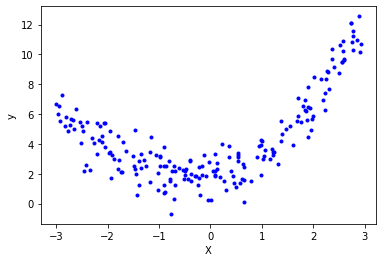

In [3]:
#plotting data
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Applying linear regression
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.26848816532037867

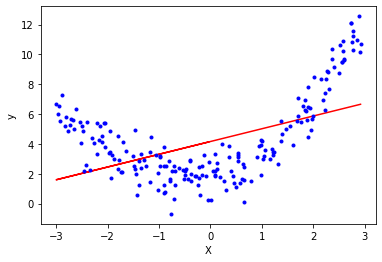

In [5]:
#Plotting data
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

- Observation :
    1. not following polynomial data
    2. LR is not able to Predict output

In [6]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [7]:
print(X_train[0])
print(X_train_trans[0])

[2.92094919]
[1.         2.92094919 8.53194419]


In [8]:
# include_bias parameter
lr = LinearRegression()

#fitting new data which has polonimial data
lr.fit(X_train_trans,y_train)

#Predicting new output
y_pred = lr.predict(X_test_trans)

#R2 Score
r2_score(y_test,y_pred)

0.8938122925831968

In [9]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.82883492 0.84135651]]
[1.93645539]


In [10]:
# Generating new data for polynomial line features
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

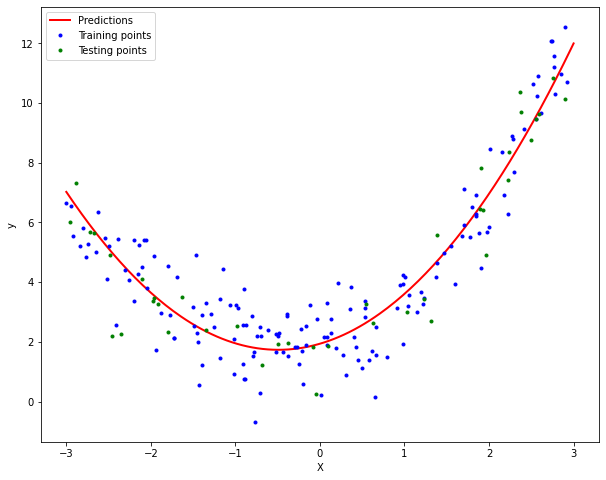

In [12]:
#Plotting data
plt.figure(figsize=(10,8))
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [24]:
# creating Function which will take data and plot graph according to given degree

def poly_regression(degree):
    X_new = np.linspace(-3,3,100).reshape(100,1) 
    
    poly_funct = PolynomialFeatures(degree = degree, include_bias=False)
    st_scaler = StandardScaler()
    lr = LinearRegression()
    
    #creating poly_regressor pipeline 
    poly_reg_pipeline = Pipeline([
                            ("poly_funct", poly_funct),
                            ("Standard Scaler", st_scaler),
                            ("Linear Regression", lr),
        
    ])
    
    #Fitting X_train, y_train to pipeline model
    poly_reg_pipeline.fit(X,y)
    
    y_new_pred = poly_reg_pipeline.predict(X_new)
    
    #Plotting data according to degree
    plt.figure(figsize = (10,8))
    plt.plot(X_new, y_new_pred,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=4)
    plt.plot(X_test, y_test, "g.", linewidth=4)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

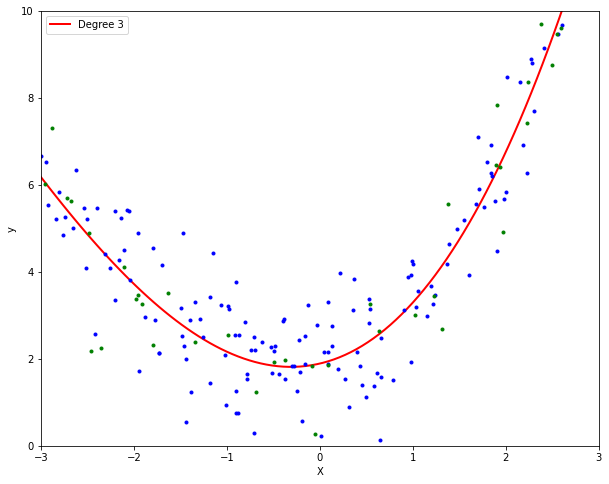

In [31]:
poly_regression(3)